In [1]:
import numpy as np
from numpy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt

from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter

import mne

sfreq = 1000.
f_p = 40.
# limits for plotting
flim = (1., sfreq / 2.)  # frequencies
dlim = (-0.2, 0.2)  # delays

Ideal low-pass filter, where magnitude drops instantaneously to zero at the cutoff frequency -> hypothetically achieves zero ripple in the frequency domain, perfect attenuation, and perfect steepness:

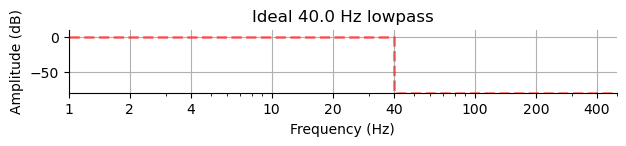

In [3]:
nyq = sfreq / 2.  # the Nyquist frequency is half our sample rate
freq = [0, f_p, f_p, nyq]
gain = [1, 1, 0, 0]

third_height = np.array(plt.rcParams['figure.figsize']) * [1, 1. / 3.]
ax = plt.subplots(1, figsize=third_height)[1]
plot_ideal_filter(freq, gain, ax, title='Ideal %s Hz lowpass' % f_p, flim=flim);

The above filter would be only be possible with an infinite order -> infinite time-domain ringing. The ideal frequency has optimal frequency response but impractical time-domain characteristics. 

In practice, 4 main methods are used for FIR design:
1. The Remez algorithm (`scipy.signal.remez()`)
2. Windowed FIR design (`scipy.signal.firwin2()`, `scipy.signal.firwin()`) -> primarily used for EEG
3. Least squares design (`scipy.signal.firls()`)
4. Frequency-domain design (construct filter in Fourier domain and use an `IFFT` to invert it)